# EDA

In [ ]:
# Import Data and EDA libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

full_data = pd.read_csv('/Users/riowombacher/DATA1030/rideshare_price_predictor/data/full_data.csv')

In [ ]:
# Cheack the shape and the first few rows of the data
print('\nShape:')
print(full_data.shape)
print('\nData:')
print(full_data.head())


Shape:
(693071, 15)

Data:
                                     id     timestamp  hour  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type    product_id          name  price  distance  surge_multiplier  \
0     Lyft     lyft_line        Shared    5.0      0.

In [ ]:
# Check for null values and variable data types
print(full_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                693071 non-null  object 
 1   timestamp         693071 non-null  float64
 2   hour              693071 non-null  int64  
 3   datetime          693071 non-null  object 
 4   timezone          693071 non-null  object 
 5   source            693071 non-null  object 
 6   destination       693071 non-null  object 
 7   cab_type          693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
 10  price             637976 non-null  float64
 11  distance          693071 non-null  float64
 12  surge_multiplier  693071 non-null  float64
 13  temperature       693071 non-null  float64
 14  short_summary     693071 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 79.3+ MB
None


In [5]:
print(full_data['timezone'].nunique())
print(full_data['id'].nunique())

1
693071


In [ ]:
print(full_data['product_id'].value_counts())
print(full_data['name'].value_counts())

product_id
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft_luxsuv                             51235
lyft                                    51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: count, dtype: int64
name
UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lux Black XL    51235
Lyft            51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: count, dtype: int64


ID and Timestamp are just unique identifiers so we can drop them. Product id seems to be a worse form of the name variable so drop that.  All rides are in Boston so we can drop timezone.

In [8]:
updated_data = full_data.drop(['id', 'timestamp', 'timezone', 'product_id'], axis = 1)

In [ ]:
# Identify nulls
null_counts = updated_data.isnull().sum()
null_count = null_counts[null_counts > 0]
print(null_count)

price    55095
dtype: int64


In [10]:
null_pct = np.round((null_count.values[0] / updated_data.shape[:1] * 100).item(), 2)
print(f'{null_pct}' + '% of the data is null')

7.95% of the data is null


In [ ]:
# Price is the only column with null values 
# Check these rows out to see if they can be imputed with some value or they have to be deleted
nulls = updated_data[updated_data['price'].isnull()]
nulls.head()

,hour,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary
18,14,2018-12-01 14:13:04,North End,West End,Uber,Taxi,NaN,1.11,1.0,36.99,Partly Cloudy
31,23,2018-12-02 23:52:56,Beacon Hill,South Station,Uber,Taxi,NaN,2.48,1.0,48.83,Overcast
40,20,2018-11-29 20:38:05,North Station,Fenway,Uber,Taxi,NaN,2.94,1.0,42.50,Partly Cloudy
60,20,2018-12-13 20:10:16,North End,West End,Uber,Taxi,NaN,1.16,1.0,33.15,Mostly Cloudy
69,13,2018-11-30 13:08:03,North End,Beacon Hill,Uber,Taxi,NaN,2.67,1.0,31.80,Clear


In [12]:
nulls['name'].value_counts()

name
Taxi    55095
Name: count, dtype: int64

In [13]:
#Get rid of null values because they are taxi rides so we are not interested in them
updated_data = updated_data.dropna()
print(updated_data.shape)

(637976, 11)


In [ ]:
# Check for duplicates
duplicate_rows = updated_data[updated_data.duplicated(keep=False)]

# Print out the duplicate rows
duplicate_rows.sort_values(by = ['datetime', 'destination'])

,hour,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary
383363,5,2018-11-26 05:14:01,Fenway,West End,Uber,WAV,10.5,2.72,1.0,41.99,Overcast
616863,5,2018-11-26 05:14:01,Fenway,West End,Uber,WAV,10.5,2.72,1.0,41.99,Overcast
482113,6,2018-11-26 06:16:16,Haymarket Square,Financial District,Uber,Black SUV,26.5,0.99,1.0,41.83,Overcast
482114,6,2018-11-26 06:16:16,Haymarket Square,Financial District,Uber,Black,16.0,0.99,1.0,41.83,Overcast
545215,6,2018-11-26 06:16:16,Haymarket Square,Financial District,Uber,Black,16.0,0.99,1.0,41.83,Overcast
...,...,...,...,...,...,...,...,...,...,...,...
543005,16,2018-12-18 16:10:12,Beacon Hill,Boston University,Uber,UberXL,15.0,2.27,1.0,28.58,Partly Cloudy
30859,17,2018-12-18 17:05:08,Theatre District,Haymarket Square,Uber,UberX,8.5,1.61,1.0,30.78,Clear
432613,17,2018-12-18 17:05:08,Theatre District,Haymarket Square,Uber,UberX,8.5,1.61,1.0,30.78,Clear
276653,19,2018-12-18 19:00:16,Boston University,Theatre District,Uber,UberX,10.5,2.98,1.0,32.34,Clear


Need to get rid of the duplicates, can keep the first observation because they are exact duplicates

In [15]:
updated_data = updated_data.drop_duplicates()
len(updated_data)

637036

Lose 940 rows due to removing duplicates

### Now lets check the distributions of our variables

In [ ]:
# Change datetime to datetime object
updated_data['datetime'] = pd.to_datetime(updated_data['datetime'])

In [ ]:
# Get the range of dates from our data
max_dates = max(updated_data['datetime'])
min_dates = min(updated_data['datetime'])
print(max_dates)
print(min_dates)

2018-12-18 19:15:10
2018-11-26 03:40:46


<Axes: xlabel='datetime'>

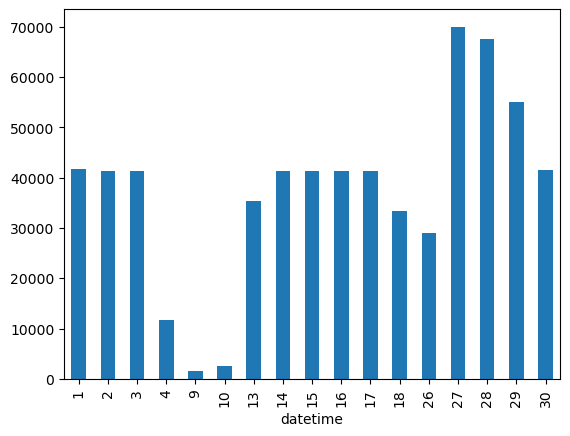

In [ ]:
# Check the distribution of the data by the date
updated_data['datetime'].dt.day.value_counts().sort_index().plot(kind='bar')

All the data takes place between November 26th to December 18th in 2018 in Boston

**Important to remember that all "rides" here are just checking the price at a certain time through an API and do not refelct the actual ride demand data for Uber or Lyft**

In [ ]:
#Create a day of the week variable from the datetime variable
updated_data['day_of_week'] = updated_data['datetime'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
updated_data['day_of_week'] = pd.Categorical(updated_data['day_of_week'], categories=days_order, ordered=True)

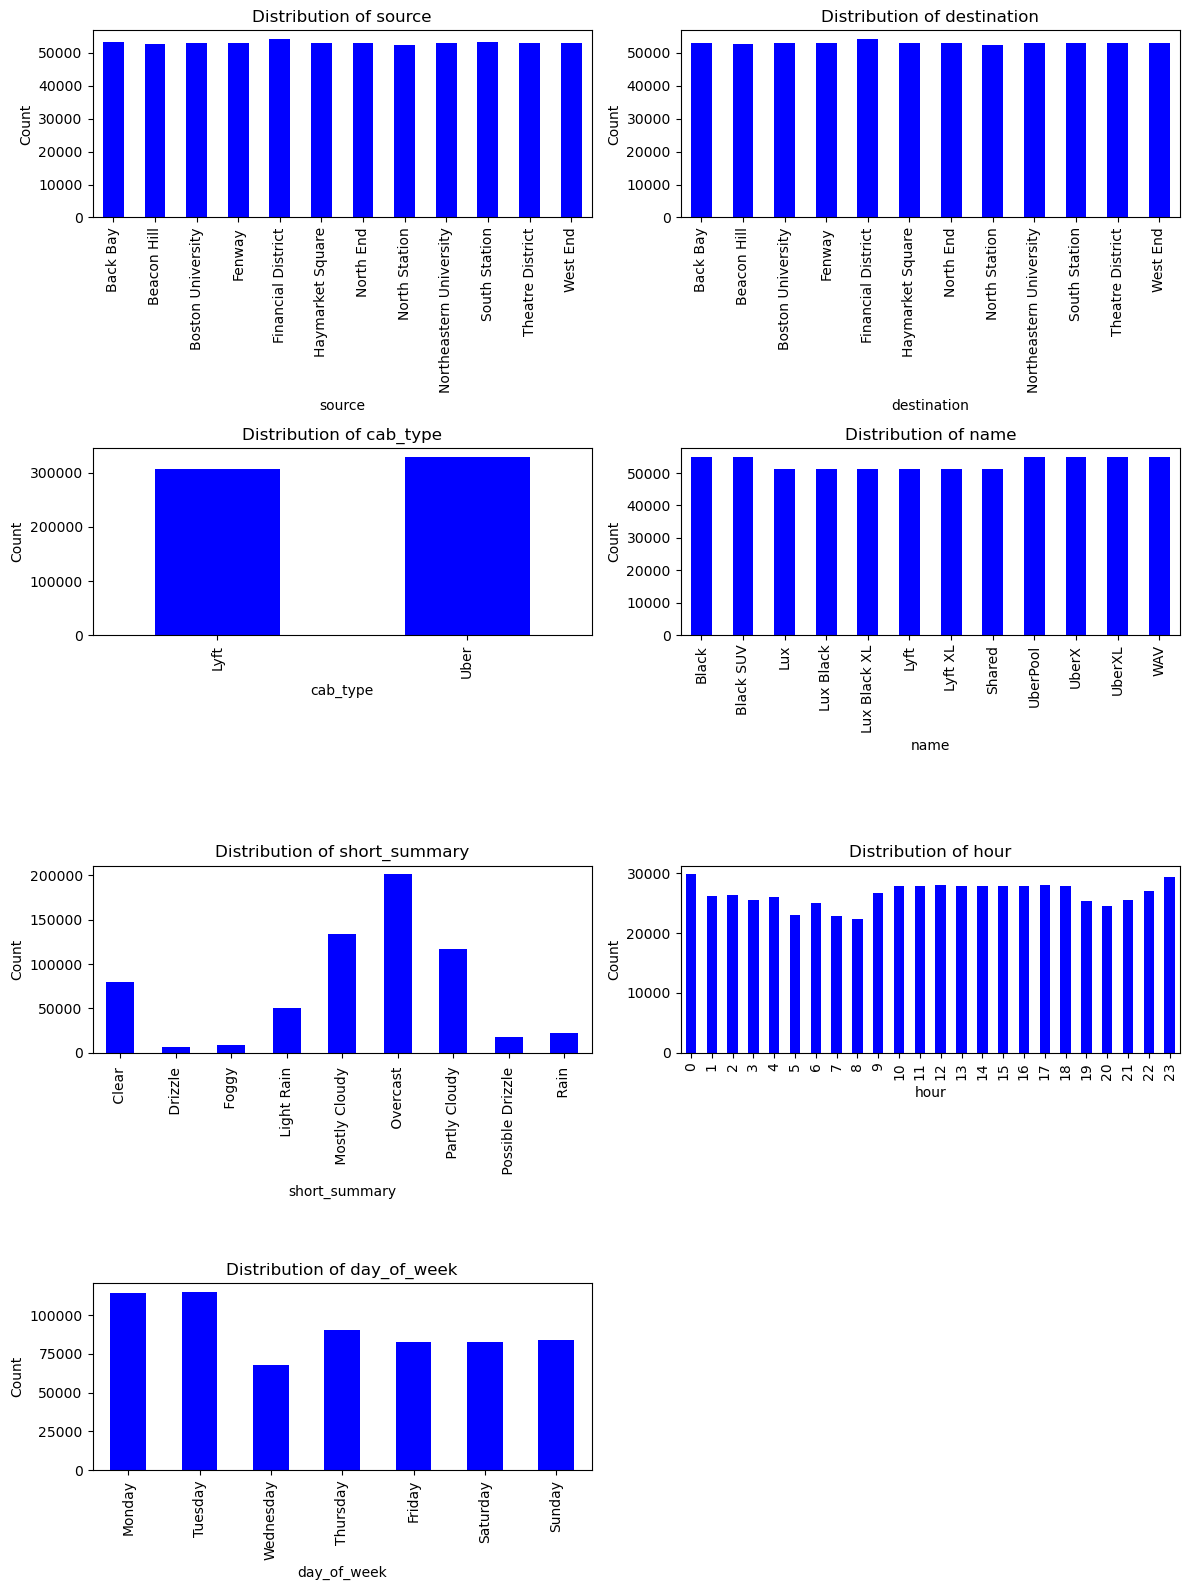

In [ ]:
# Lets check the distribution of our categorical data through boxplots
categorical_columns = updated_data.select_dtypes(include='object').columns

# Include 'hour' and 'day_of_week' columns
additional_columns = ['hour', 'day_of_week']

# Combine both lists
columns_to_plot = list(categorical_columns) + additional_columns
n_cols = 2  # Number of columns for subplots
n_rows = (len(columns_to_plot) + 1) // n_cols  # Number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot the distribution of each categorical variable
for i, col in enumerate(columns_to_plot):
    updated_data[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()



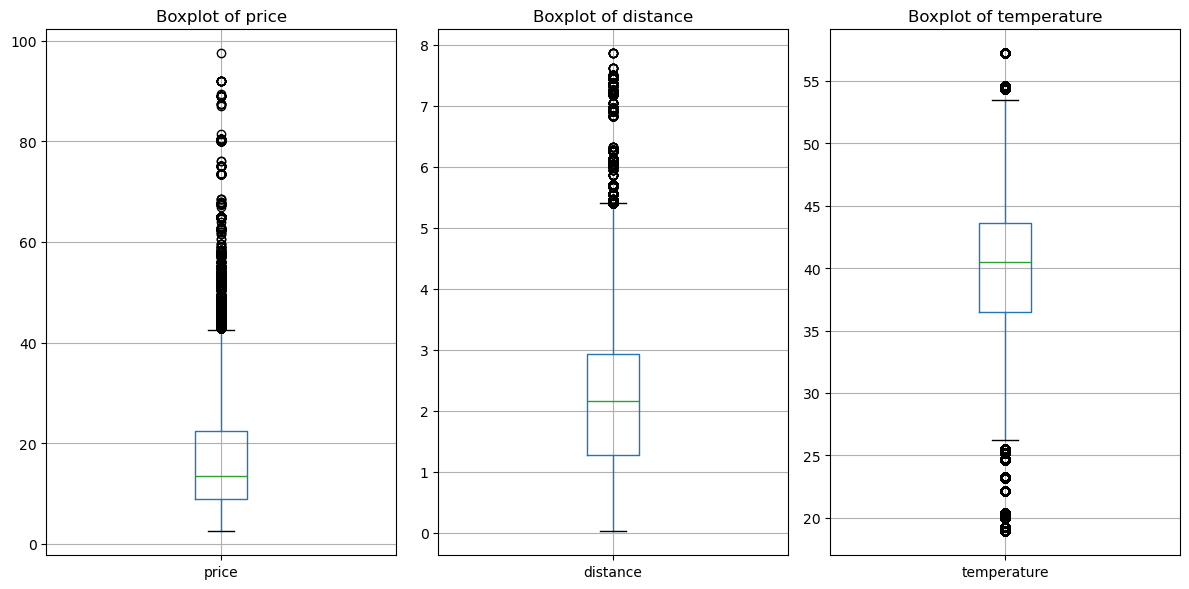

In [ ]:
# Now let's check the distribution of the numerical data though boxplots
columns_to_plot = ['price', 'distance', 'temperature']
plt.figure(figsize=(12, 6))

# Plot the distribution of each numerical variable
for i, col in enumerate(columns_to_plot):
    plt.subplot(1, 3, i + 1) 
    updated_data.boxplot(column=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


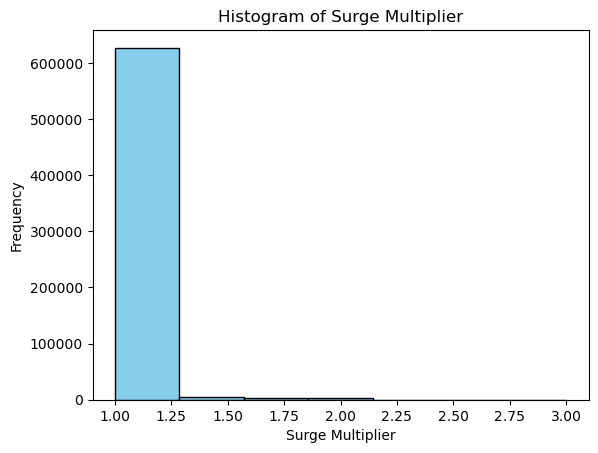

In [23]:
# Plot the histogram of the surge multiplier
plt.hist(updated_data['surge_multiplier'], bins=updated_data['surge_multiplier'].nunique(), color='skyblue', edgecolor='black')
plt.title('Histogram of Surge Multiplier')
plt.xlabel('Surge Multiplier')
plt.ylabel('Frequency')
plt.show()

In [24]:
updated_data['surge_multiplier'].value_counts()

surge_multiplier
1.00    616061
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: count, dtype: int64

Now lets explore some variable to variable relationships

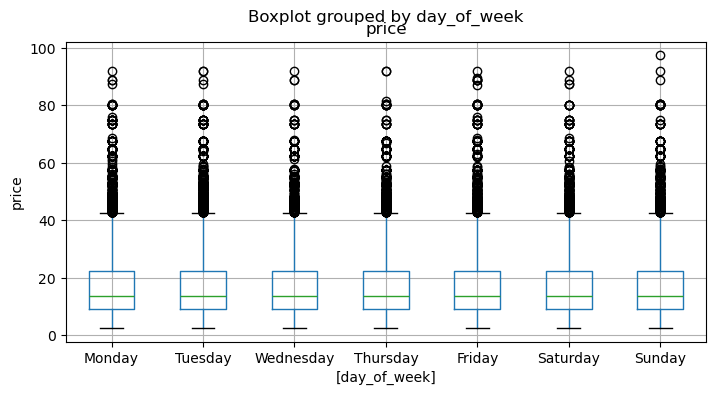

In [25]:
# Plot the price vs the day of the week to explore if certain days are more expensive to get a ride
updated_data[['price', 'day_of_week']].boxplot(by = 'day_of_week', figsize =(8,4))
plt.ylabel('price')
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/price_by_dof_boxplot.png", bbox_inches='tight')
plt.show()

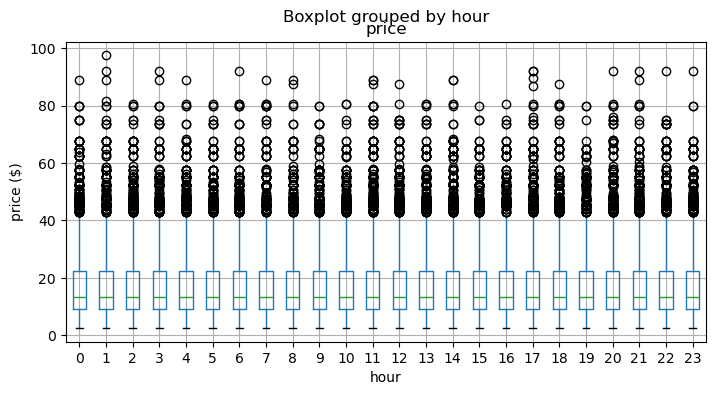

In [26]:
# Same as above but for the hour of the day
updated_data[['price', 'hour']].boxplot(by = 'hour', figsize =(8,4))
plt.ylabel('price ($)')
plt.xlabel('hour')
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/price_by_hour_boxplot.png", bbox_inches='tight')
plt.show()

Surprising that hour of the day and the day of the week don't seem to have an impact on the price

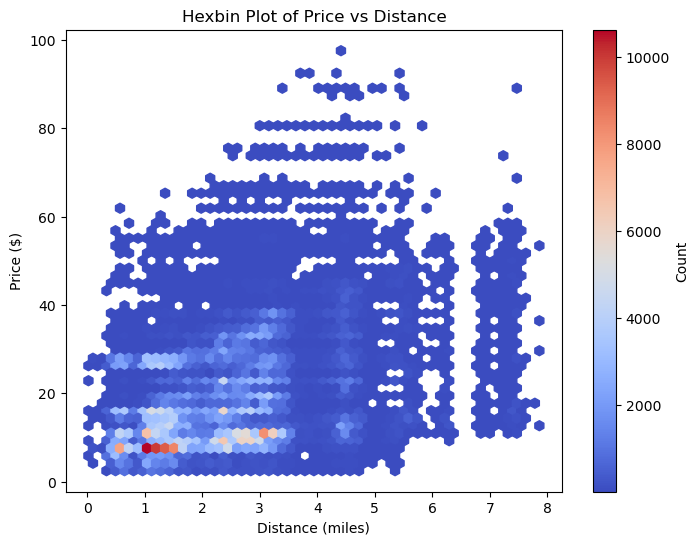

In [27]:
# Hexbin plot of price vs distance to see the relationship and the frequency of rides for each price and distance
plt.figure(figsize=(8, 6))
plt.hexbin(updated_data['distance'], updated_data['price'], gridsize=50, cmap='coolwarm', mincnt=1)

plt.colorbar(label='Count')
plt.xlabel('Distance (miles)')
plt.ylabel('Price ($)')
plt.title('Hexbin Plot of Price vs Distance')
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/price_vs_dist_hexbin.png", bbox_inches='tight')
plt.show()

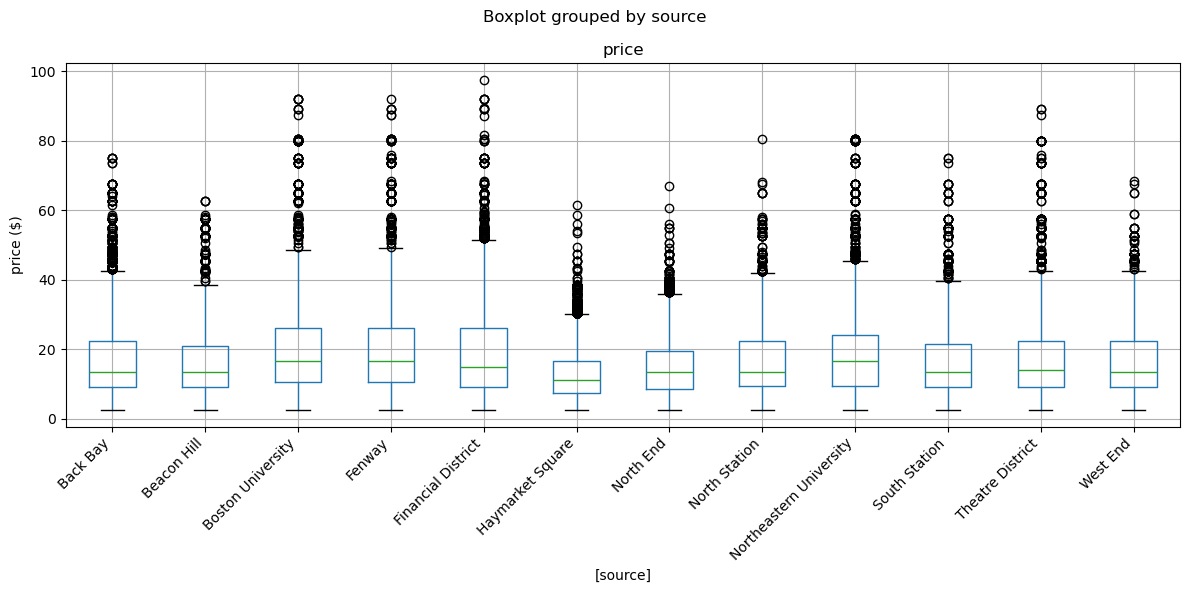

In [29]:
# Explore of the origin of your ride affects the price
updated_data[['price', 'source']].boxplot(by = 'source', figsize =(12,6))
plt.ylabel('price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

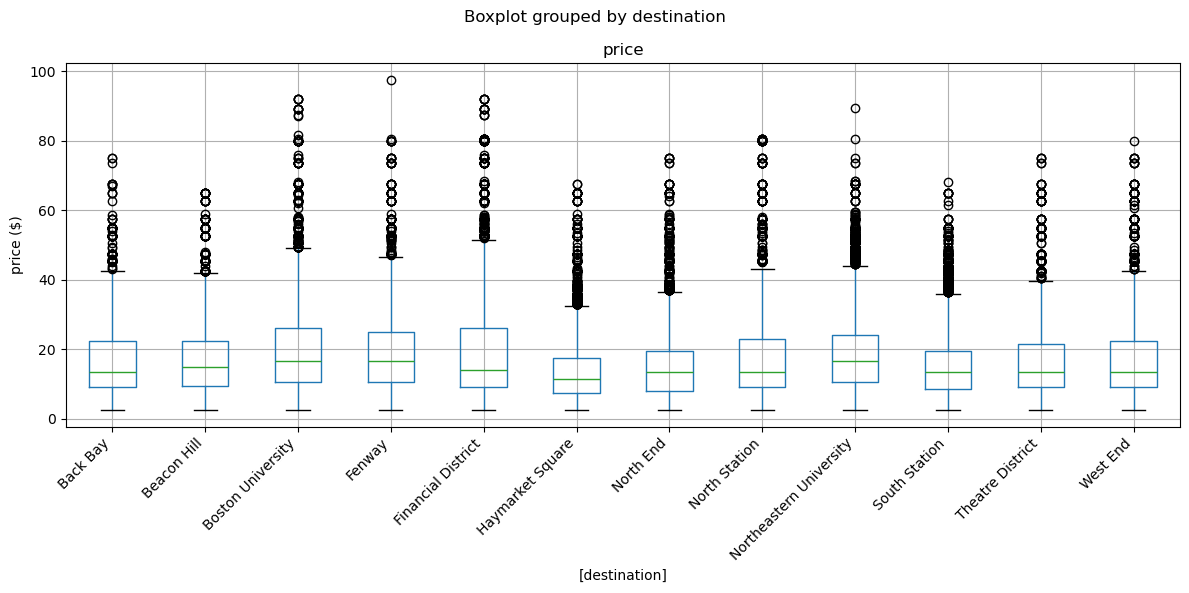

In [30]:
# Explore of the destination of your ride affects the price
updated_data[['price', 'destination']].boxplot(by = 'destination', figsize =(12,6))
plt.ylabel('price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
# Reminder of the types of cars available
updated_data[['cab_type','name']].value_counts()

cab_type  name        
Uber      UberXL          55005
          Black SUV       54982
          UberPool        54980
          Black           54971
          WAV             54955
          UberX           54952
Lyft      Lux Black XL    51209
          Shared          51205
          Lux             51204
          Lyft            51196
          Lyft XL         51189
          Lux Black       51188
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

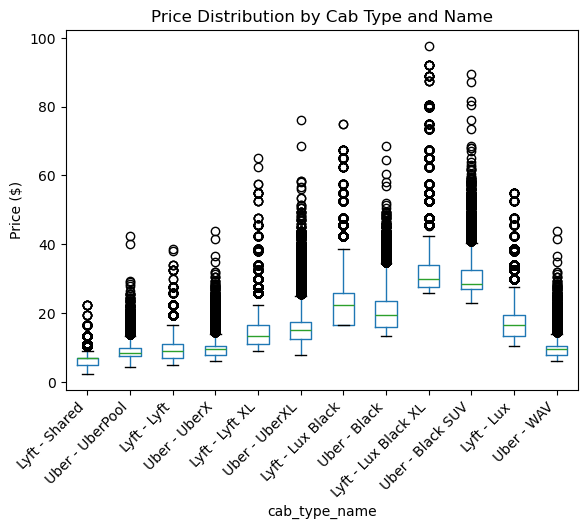

In [32]:
#Create customer order so that similar car types are next to each other regardless of  company
custom_order = ['Lyft - Shared', 'Uber - UberPool', 'Lyft - Lyft', 'Uber - UberX', 'Lyft - Lyft XL', 
                'Uber - UberXL', 'Lyft - Lux Black', 'Uber - Black', 'Lyft - Lux Black XL', 
                'Uber - Black SUV', 'Lyft - Lux', 'Uber - WAV']

# Create a new column combining 'cab_type' and 'name'
plot_data = updated_data.copy()
plot_data['cab_type_name'] = plot_data['cab_type'] + ' - ' + plot_data['name']

# Reorder the DataFrame
plot_data['cab_type_name'] = pd.Categorical(plot_data['cab_type_name'], categories=custom_order, ordered=True)
plot_data = plot_data.sort_values('cab_type_name')

# Create the box plot
plt.figure(figsize=(12, 6))
plot_data.boxplot(column='price', by='cab_type_name', grid=False)
plt.xticks(rotation=45, ha='right')  
plt.ylabel('Price ($)')
plt.title('Price Distribution by Cab Type and Name')
plt.suptitle('') 
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/price_by_car_type.png", bbox_inches='tight')
plt.show()


It seems that Lyft has slightly lower prices for more basic rides, while Uber is slightly cheaper for luxury rides

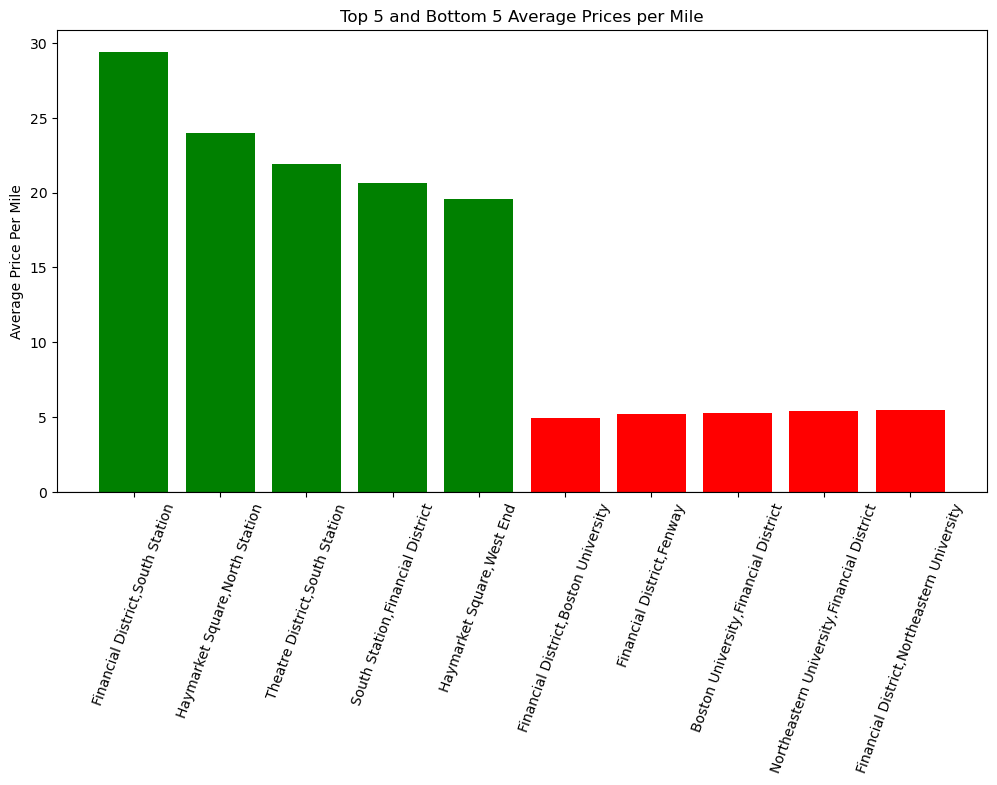

In [ ]:
# Now lets explore if rides for specific origin and destination pairs are more expensive
# We want to do this on an average price per mile basis because distance has a positive correlation with price obviously
avg_price_per_mile = (
    updated_data.groupby(['source', 'destination'])
    .agg(avg_price=('price', 'mean'), avg_distance=('distance', 'mean'))  
    .reset_index()
)

avg_price_per_mile['avg_price_per_mile'] = avg_price_per_mile['avg_price'] / avg_price_per_mile['avg_distance']

# Sort by avg_price_per_mile in descending order
avg_price_per_mile = avg_price_per_mile.sort_values(by='avg_price_per_mile', ascending=False)

#Now we want to plot our top 5 and bottom 5 avg_price_per_miles
#Subset the top 5 and bottom 5
top5 = avg_price_per_mile.nlargest(5, 'avg_price_per_mile')
bottom5 = avg_price_per_mile.nsmallest(5, 'avg_price_per_mile')

combined = pd.concat([top5, bottom5])
combined['location'] = combined['source'] + ',' + combined['destination']

# Plot the top 5 and bottom 5 average prices per mile
combined.reset_index(drop=True, inplace=True)
plt.figure(figsize=(12, 6))
plt.bar(combined.index, combined['avg_price_per_mile'], color=['green'] * 5 + ['red'] * 5)
plt.xticks(combined.index, combined['location'], rotation=70)
plt.ylabel('Average Price Per Mile')
plt.title('Top 5 and Bottom 5 Average Prices per Mile')
plt.axhline(0, color='black', linewidth=0.8)
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/top5_and_bot5_price_per_mile.png", bbox_inches='tight')
plt.show()

# Machine Learning Pipeline

## Split then preprocess the data

Moving on from EDA. Our data is balanced and doesn't have group structure. Our target variable is also continuous so we can use a basic train test split here

For the name variable we want to match up the level of car for each company so that the most basic car for each company get the same number. i.e lyft and uberX vehicles are both the most basic you can get so those will both be given the int 0 to represent them and so on. We will have to do this manually so this will have to be done before we split the data

In [34]:
print(updated_data.shape)
updated_data.head()

(637036, 12)


,hour,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary,day_of_week
0,9,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,Mostly Cloudy,Sunday
1,2,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,Rain,Tuesday
2,1,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,Clear,Wednesday
3,4,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,Clear,Friday
4,3,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,Partly Cloudy,Thursday


In [ ]:
#Update the name column using name mapping to give them common identifiers for the same car type
name_mapping = {
    'Lyft': 'Basic',
    'UberX': 'Basic',
    'Lyft XL': 'XL',
    'UberXL': 'XL',
    'Lux Black': 'Black',
    'Black' : 'Black',
    'UberPool' : 'Shared',
    'Lux Black XL' : 'Black_XL',
    'Black SUV' : 'Black_XL',
}

updated_data['car_type'] = updated_data['name'].replace(name_mapping)
updated_data = updated_data.drop(columns=['name'])

In [37]:
#Don't need datetime since we have day of the week and hour variables
Y = updated_data['price']
X = updated_data.drop(columns = ['price', 'datetime'])

Now we need to preprocess the data

In [39]:
ordinal_ftrs = ['car_type', 'day_of_week', 'hour']
ordinal_cats = [
    ['Shared', 'Basic', 'WAV', 'XL', 'Lux', 'Black', 'Black_XL'],
    ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
]
onehot_ftrs = ['source', 'destination', 'cab_type', 'short_summary']
std_ftrs = ['distance', 'temperature', 'surge_multiplier']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

preprocessor = ColumnTransformer(
    transformers = [
        ('ord', OrdinalEncoder(categories= ordinal_cats), ordinal_ftrs),
        ('one_hot', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)
    ]
)

We now want to define a function that will train models for any ML algorithm we give it and returns a list of the best hyperparameters and the test scores across 3 random states, so we can evaluate the effect of randomness on our models.

In [ ]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ParameterGrid

def MLpipe_RMSE(X, y, preprocessor, ML_algo, param_grid):
    '''
    This function splits the data into train/val/test (60/20/20) and tunes hyperparameters 
    using a manual grid search over the given param_grid, and calculates the baseline RMSE

    In total it:
    1. Loops through 3 different random states
    2. Splits the data into train/val/test splits
    3. Evaluates all parameter combinations in param_grid on the validation set
    4. Selects the best parameters based on validation performance
    5. Evaluates the best model on the test set
    6. Saves the best model for each random state
    7. Returns a list of 3 test scores and 3 best parameter sets
    '''
    
    test_scores = []
    best_models = []
    baseline_scores = []

    for i in range(3):  # Loop through 4 random states
        print(f"Random state {i+1}")
        
        # Split data
        X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=i*21)
        X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=i*21)
        
        best_score = float('inf') 
        best_params = None
        best_model = None

        # Loop through all combinations of parameters in param_grid
        for params in ParameterGrid(param_grid):
            mod = ML_algo(**params)
            pipe = make_pipeline(preprocessor, mod)
            pipe.fit(X_train, y_train) 
            
            # Predict on validation set and calculate RMSE
            y_val_pred = pipe.predict(X_val)
            val_score = root_mean_squared_error(y_val, y_val_pred)
            
            # Update best model if validation score improves
            if val_score < best_score:
                best_score = val_score
                best_params = params
                best_model = pipe

        # Evaluate the best model on the test set
        y_test_pred = best_model.predict(X_test)
        test_score = root_mean_squared_error(y_test, y_test_pred)
        
        test_scores.append(test_score)
        best_models.append(best_params)

        baseline_pred = np.full_like(y_test, np.mean(y_train))  
        baseline_score = root_mean_squared_error(y_test, baseline_pred)
        baseline_scores.append(baseline_score)
        
        print(f"Baseline RMSE: {baseline_score:.4f}")
        print(f"Best model parameters: {best_params}")
        print(f"Validation RMSE: {best_score:.4f}")
        print(f"Test RMSE: {test_score:.4f}")

        model_filename = f"/Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_{str(ML_algo.__name__)}_mod_rstate_{i+1}.pkl"
        joblib.dump(best_model, model_filename)
        print(f"Saved best model for random state {i+1} at: {model_filename}")
    
    return test_scores, baseline_scores, best_models


Now we use the created function to test the performance of 4 serperate models to compare

In [42]:
# Choose the 4 models we will train
from sklearn.linear_model import Lasso 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
# Lasso model, a linear model with L1 regularization, takes about 30 seconds to run
ML_algo = Lasso
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}
scores_lasso, baseline_lasso, models_lasso = MLpipe_RMSE(X, Y, preprocessor, ML_algo, param_grid_lasso)
print(f"Mean of test scores {np.mean(scores_lasso)}")
print(f"Standard deviation of test scores: {np.std(scores_lasso)}")

Random state 1
Baseline RMSE: 9.3263
Best model parameters: {'alpha': 0.01}
Validation RMSE: 3.4925
Test RMSE: 3.4956
Saved best model for random state 1 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_Lasso_mod_rstate_1.pkl
Random state 2
Baseline RMSE: 9.3340
Best model parameters: {'alpha': 0.01}
Validation RMSE: 3.4928
Test RMSE: 3.5057
Saved best model for random state 2 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_Lasso_mod_rstate_2.pkl
Random state 3
Baseline RMSE: 9.3302
Best model parameters: {'alpha': 0.01}
Validation RMSE: 3.4832
Test RMSE: 3.4987
Saved best model for random state 3 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_Lasso_mod_rstate_3.pkl
Mean of test scores 3.5000061395928306
Standard deviation of test scores: 0.004220407585746754


In [ ]:
# K Neighbors Regressor, that takes about 30 minutes to run
ML_algo = KNeighborsRegressor
param_grid = {'n_neighbors': [2, 5, 15]}
scores_knn, baseline_knn, models_knn = MLpipe_RMSE(X, Y, preprocessor, ML_algo, param_grid)
print(f"Mean of test scores K Neighbors: {np.mean(scores_knn)}")
print(f"Standard deviation of test scores K Neighbors: {np.std(scores_knn)}")

Random state 1
Baseline RMSE: 9.3263
Best model parameters: {'n_neighbors': 15}
Validation RMSE: 2.5989
Test RMSE: 2.6148
Saved best model for random state 1 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_KNeighborsRegressor_mod_rstate_1.pkl
Random state 2
Baseline RMSE: 9.3340
Best model parameters: {'n_neighbors': 15}
Validation RMSE: 2.6017
Test RMSE: 2.6273
Saved best model for random state 2 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_KNeighborsRegressor_mod_rstate_2.pkl
Random state 3
Baseline RMSE: 9.3302
Best model parameters: {'n_neighbors': 15}
Validation RMSE: 2.5872
Test RMSE: 2.5984
Saved best model for random state 3 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_KNeighborsRegressor_mod_rstate_3.pkl
Mean of test scores K Neighbors: 2.6135145234638073
Standard deviation of test scores K Neighbors: 0.011871122097393817


In [ ]:
# XGBRegressor, takes about 10 minutes to run
ML_algo = XGBRegressor
param_grid_xgr = {'max_depth': [1, 5, 15],
              'n_estimators': [5, 40, 100],
              'learning_rate': [0.01, 0.1],
              'subsample': [0.75, 1.0],
              'random_state': [21]}

scores_xgr, baseline_xgr, models_xgr = MLpipe_RMSE(X, Y, preprocessor, ML_algo, param_grid_xgr)

print(f"Mean of test scores XGBRegressor: {np.mean(scores_xgr)}")
print(f"Standard deviation of test scores XGBRegressor: {np.std(scores_xgr)}")

Random state 1
Baseline RMSE: 9.3263
Best model parameters: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 40, 'random_state': 21, 'subsample': 1.0}
Validation RMSE: 1.6861
Test RMSE: 1.6993
Saved best model for random state 1 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_XGBRegressor_mod_rstate_1.pkl
Random state 2
Baseline RMSE: 9.3340
Best model parameters: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 40, 'random_state': 21, 'subsample': 0.75}
Validation RMSE: 1.6822
Test RMSE: 1.6946
Saved best model for random state 2 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_XGBRegressor_mod_rstate_2.pkl
Random state 3
Baseline RMSE: 9.3302
Best model parameters: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 40, 'random_state': 21, 'subsample': 0.75}
Validation RMSE: 1.6583
Test RMSE: 1.6967
Saved best model for random state 3 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_XGBRegressor_m

In [ ]:
# Random Forest Regressor, takes about 30 minutes to run
ML_algo = RandomForestRegressor
param_grid_rf = {'max_depth': [1, 5, 15],
              'n_estimators': [5, 40, 100],
              'random_state': [21]}
scores_rf, baseline_rf, models_rf = MLpipe_RMSE(X, Y, preprocessor, ML_algo, param_grid_rf)
print(f"Mean of test scores Random Forest: {np.mean(scores_rf)}")
print(f"Standard deviation of test scores Random Forest: {np.std(scores_rf)}")

Random state 1
Baseline RMSE: 9.3263
Best model parameters: {'max_depth': 15, 'n_estimators': 100, 'random_state': 21}
Validation RMSE: 1.6626
Test RMSE: 1.6731
Saved best model for random state 1 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_RandomForestRegressor_mod_rstate_1.pkl
Random state 2
Baseline RMSE: 9.3340
Best model parameters: {'max_depth': 15, 'n_estimators': 100, 'random_state': 21}
Validation RMSE: 1.6595
Test RMSE: 1.6732
Saved best model for random state 2 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_RandomForestRegressor_mod_rstate_2.pkl
Random state 3
Baseline RMSE: 9.3302
Best model parameters: {'max_depth': 15, 'n_estimators': 100, 'random_state': 21}
Validation RMSE: 1.6388
Test RMSE: 1.6700
Saved best model for random state 3 at: /Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_RandomForestRegressor_mod_rstate_3.pkl
Mean of test scores Random Forest: 1.6720970527307275
Standard deviation of 

**Best Model is Random Forest with a mean RMSE of 1.67**

Now we can calculate the baseline RMSE and compare our models to it.

In [48]:
results = []

# Dictionary containing scores for each model and their corresponding baseline scores
models_dict = {
    'Lasso': {'scores': scores_lasso, 'baseline_scores': baseline_lasso},
    'KNeighbors': {'scores': scores_knn, 'baseline_scores': baseline_knn},
    'XGBoost': {'scores': scores_xgr, 'baseline_scores': baseline_xgr},
    'RandomForest': {'scores': scores_rf, 'baseline_scores': baseline_rf}
}

# Loop through each model's scores and baseline scores to compute the required metrics
for model_name, data in models_dict.items():
    scores = data['scores']
    baseline_scores = data['baseline_scores']
    
    mean_rmse = np.mean(scores)
    std_rmse = np.std(scores)
    mean_baseline_rmse = np.mean(baseline_scores)
    std_baseline_rmse = np.std(baseline_scores)
    
    # Calculate std_above_baseline
    std_above_baseline = (mean_baseline_rmse - mean_rmse) / std_baseline_rmse
    
    # Append results to the list
    results.append({
        'model': model_name,
        'mean_rmse': mean_rmse,
        'std_rmse': std_rmse,
        'mean_baseline_rmse': mean_baseline_rmse,
        'std_baseline_rmse': std_baseline_rmse,
        'std_above_baseline': std_above_baseline
    })

# Convert results list to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


          model  mean_rmse  std_rmse  mean_baseline_rmse  std_baseline_rmse  \
0         Lasso   3.500006  0.004220            9.330152           0.003124   
1    KNeighbors   2.613515  0.011871            9.330152           0.003124   
2       XGBoost   1.696868  0.001891            9.330152           0.003124   
3  RandomForest   1.672097  0.001468            9.330152           0.003124   

   std_above_baseline  
0         1866.438876  
1         2150.236666  
2         2443.688002  
3         2451.618194  


# Model Explainability

### We want to be able to explain our model's predictions and which variables prove to be the most impactful

Feature Importance: Global

In [74]:
#Need to get the feature names for our shap plots
feature_names = []

for name, transformer, columns in preprocessor.transformers_:
    if hasattr(transformer, 'get_feature_names_out'):  # Transformers like OneHotEncoder
        names = transformer.get_feature_names_out(columns)
    else:  # Transformers like StandardScaler or passthrough
        names = columns
    feature_names.extend(names)

#Need to split the data for that random state and preprocess again to get the right data for our plots
random_state = 42  
X_train, X_other, y_train, y_other = train_test_split(X, Y, test_size=0.4, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=random_state)
X_train_trans = preprocessor.fit_transform(X_train)
X_val_trans = preprocessor.transform(X_val)
X_test_trans = preprocessor.transform(X_test)

In [76]:
import shap

# Load the best models for the 3rd random state
lasso_model = joblib.load('/Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_Lasso_mod_rstate_3.pkl')
kn_model = joblib.load('/Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_KNeighborsRegressor_mod_rstate_3.pkl')
rf_model = joblib.load('/Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_RandomForestRegressor_mod_rstate_3.pkl')
xgb_model = joblib.load('/Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_XGBRegressor_mod_rstate_3.pkl')

# Extract the actual models from the pipelines
rf_actual_model = rf_model.named_steps['randomforestregressor']
xgb_actual_model = xgb_model.named_steps['xgbregressor']
lasso_actual_model = lasso_model.named_steps['lasso']
kn_actual_model = kn_model.named_steps['kneighborsregressor']

random_state = 42  

# Sample from the test data since the dataset is very large
X_sample = shap.sample(X_test_trans, 1000, random_state=random_state)

# For Random Forest
explainer_rf = shap.TreeExplainer(rf_actual_model)
shap_values_rf = explainer_rf.shap_values(X_sample)
shap.summary_plot(shap_values_rf, X_sample, feature_names=feature_names, show=False)
plt.title("Random Forest")
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/rf_shap_plot.png", bbox_inches='tight')
plt.clf() 

# For XGBoost
explainer_xgb = shap.TreeExplainer(xgb_actual_model)
shap_values_xgb = explainer_xgb.shap_values(X_sample)
shap.summary_plot(shap_values_xgb, X_sample, feature_names=feature_names, show=False)
plt.title("XGBoost")
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/xgb_shap_plot.png", bbox_inches='tight')
plt.clf() 


<Figure size 800x950 with 0 Axes>

In [51]:
# For Lasso
explainer_lasso = shap.Explainer(lasso_actual_model, X_sample)
shap_values_lasso = explainer_lasso(X_sample)
shap.summary_plot(shap_values_lasso, X_sample, feature_names=feature_names, show=False)
plt.title("Lasso")
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/lasso_shap_plot.png", bbox_inches='tight')  
plt.clf()  

<Figure size 800x950 with 0 Axes>

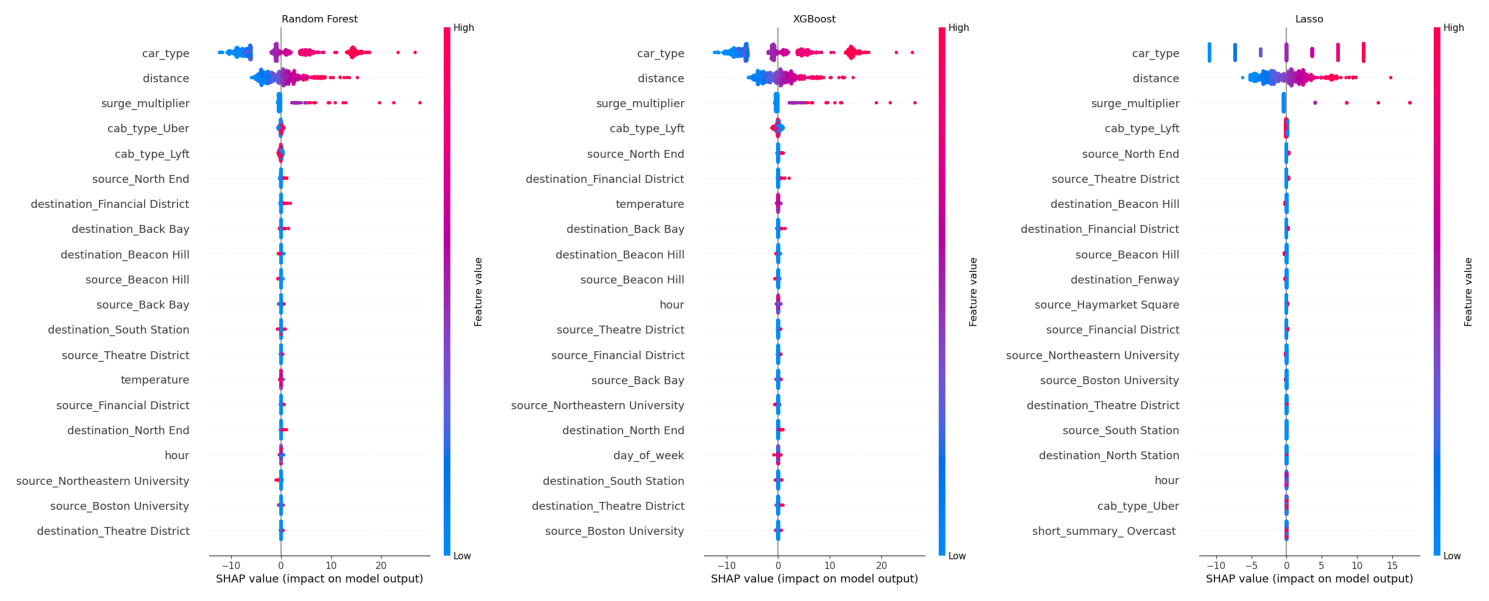

In [ ]:
import matplotlib.image as mpimg

# Examine the Shap plots for our models (KNN is not included because it is self explanatory)
shap_plot_paths = [
    '/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/rf_shap_plot.png',  
    '/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/xgb_shap_plot.png',  
    '/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/lasso_shap_plot.png',
]

fig, axes = plt.subplots(1, 3, figsize=(15, 12))

for i, ax in enumerate(axes.flat):
    img = mpimg.imread(shap_plot_paths[i])  
    ax.imshow(img)  
    ax.axis('off')  

plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/combined_shap_plot.png", bbox_inches='tight')  
plt.tight_layout()
plt.show()

In [ ]:
# See if random forest feature importance are any different from the shap values
importances = rf_actual_model.feature_importances_

print("Feature Importances:")
print(importances)

# Create a DataFrame to make it easier to view
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(feature_importances_df)


Feature Importances:
[7.84374403e-01 6.67779299e-04 1.22103481e-03 4.07877733e-04
 3.69668100e-04 3.23365196e-04 1.67155928e-04 1.98803541e-04
 5.53875126e-05 3.81846643e-04 1.06246343e-04 2.50698753e-04
 1.51693534e-04 1.46333089e-04 1.66897129e-04 5.38867436e-04
 2.77613370e-04 1.17624389e-04 1.11832260e-04 5.92100869e-04
 5.92588960e-05 1.85470582e-04 1.41576378e-04 1.57851551e-04
 4.25262713e-04 1.52065744e-04 1.42384704e-04 2.87918339e-03
 3.01784980e-03 9.88080532e-05 7.33252715e-05 3.70793206e-05
 1.02268975e-04 1.57044164e-04 1.50409639e-04 1.46999878e-04
 7.49388046e-05 7.83467100e-05 1.53312848e-01 1.93596594e-03
 4.60438326e-02]
                                Feature  Importance
0                              car_type    0.784374
38                             distance    0.153313
40                     surge_multiplier    0.046044
28                        cab_type_Uber    0.003018
27                        cab_type_Lyft    0.002879
39                          temperature 

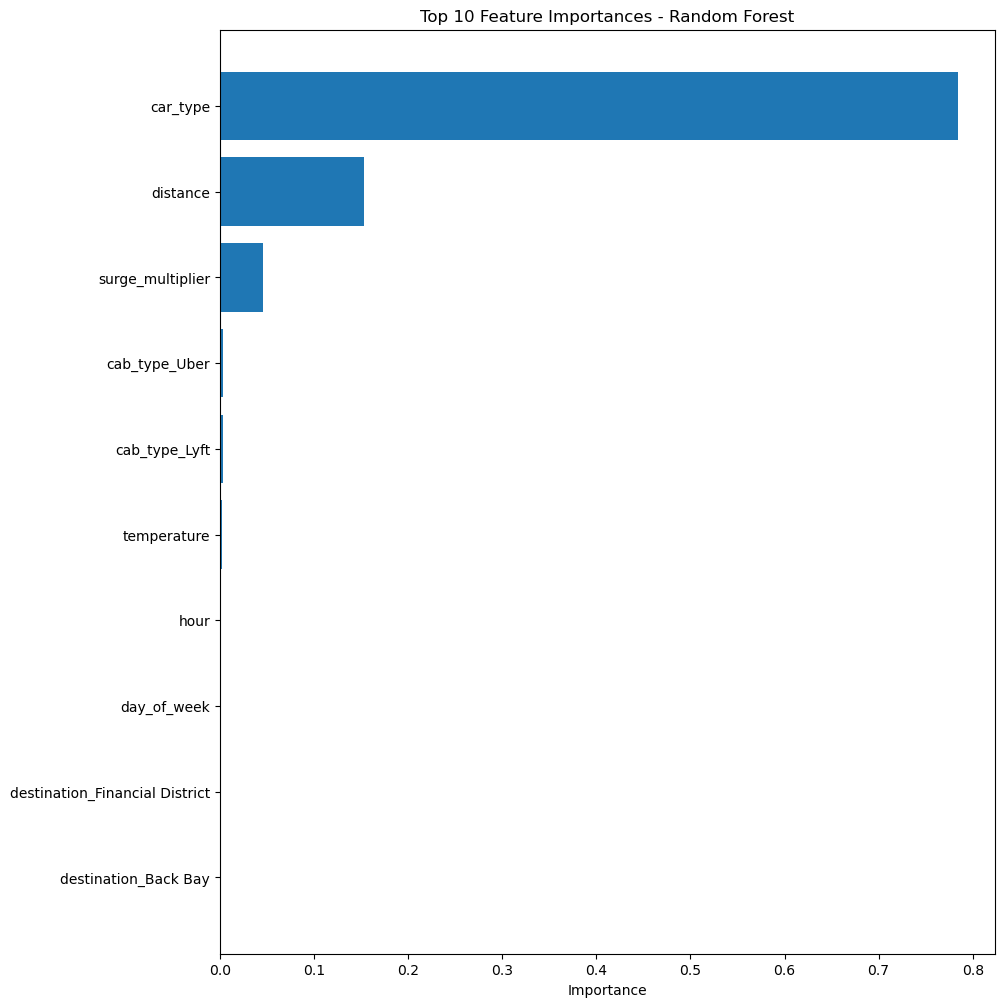

In [ ]:
# Plot the top 10 features
top_10_features = feature_importances_df.nlargest(10, 'Importance')

plt.figure(figsize=(10, 12))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances - Random Forest')
plt.gca().invert_yaxis()  # Ensure the most important feature is at the top
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/feature_importance_rf_top10.png", bbox_inches='tight')
plt.show()

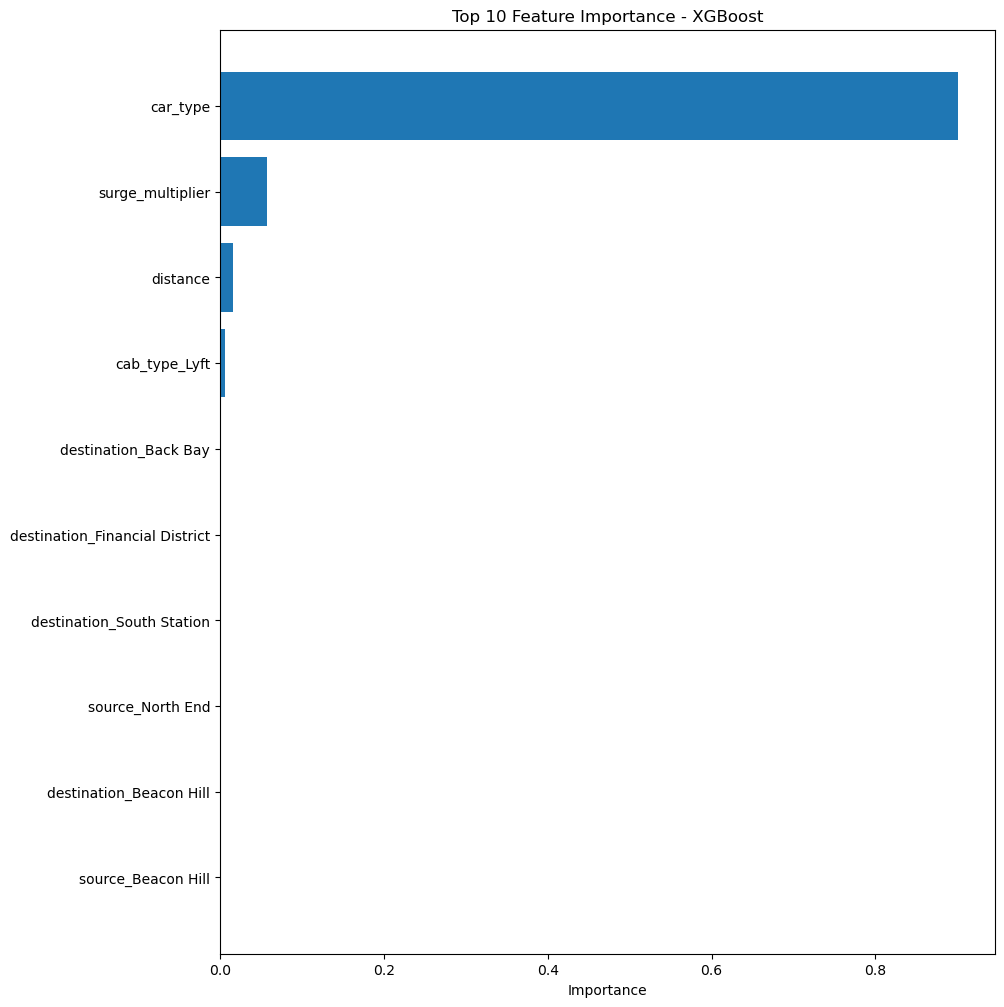

In [ ]:
# Examine the XGB feature importances
xgb_importances = xgb_actual_model.feature_importances_

# Create a DataFrame to store feature names and their importance values
feature_importances_df_xgb = pd.DataFrame({
    'Feature': feature_names, 
    'Importance': xgb_importances
})

# Select top 10 features by importance and plot them
top_10_features_xgb = feature_importances_df_xgb.nlargest(10, 'Importance')

plt.figure(figsize=(10, 12))
plt.barh(top_10_features_xgb['Feature'], top_10_features_xgb['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance - XGBoost')
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/feature_importance_xg_top10.png", bbox_inches='tight')
plt.show()


### Let's now examine local importances to see how individual predictions are made

In [ ]:
# Initialize the JS visualization code
shap.initjs()

In [ ]:
# View how the predicted price was made for this specific point for each model
# Lasso explanation
index = 32
print(explainer_lasso.expected_value)  
shap_values_for_instance = shap_values_lasso[index].values
shap.force_plot(explainer_lasso.expected_value, shap_values_for_instance, features=X_sample[index,:] , feature_names=feature_names)

16.780668842515926


In [ ]:
# Random Forest explanation
index = 32
print(explainer_rf.expected_value)  
shap_values_for_instance = shap_values_rf[index] 
shap.force_plot(explainer_rf.expected_value, shap_values_for_instance, features=X_sample[index, :] , feature_names=feature_names)


[16.55810666]


In [ ]:
# XGBoost explanation
index = 32
print(explainer_xgb.expected_value)  
shap_values_for_instance = shap_values_xgb[index] 
shap.force_plot(explainer_xgb.expected_value, shap_values_for_instance, features=X_sample[index, :] , feature_names=feature_names)

16.550512


In [ ]:
# Save the force plot for the report
index = 32
print(explainer_xgb.expected_value)
shap_values_for_instance = shap_values_xgb[index]
force_plot = shap.force_plot(explainer_xgb.expected_value, shap_values_for_instance, 
                             features=X_sample[index, :] , feature_names=feature_names)

force_plot_html = '/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/xgb_force_plot_index_32.html'
shap.save_html(force_plot_html, force_plot)


16.550512


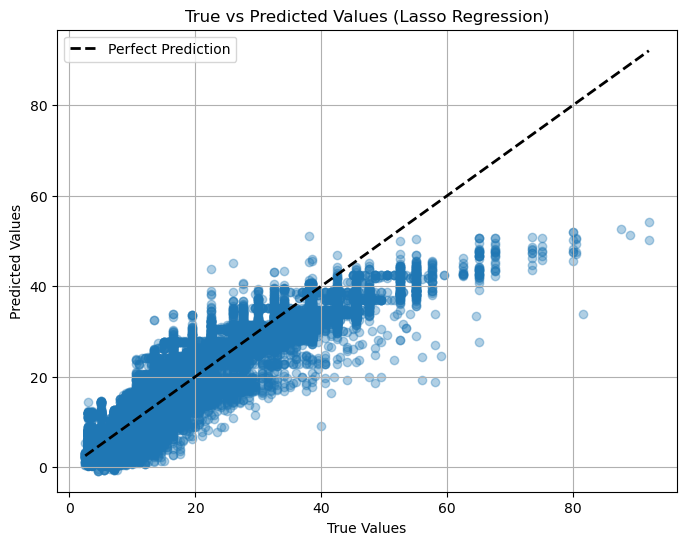

In [ ]:
# View how the predicted price compares to true prices for our Lasso model
model_path = "/Users/riowombacher/DATA1030/rideshare_price_predictor/results/best_Lasso_mod_rstate_3.pkl"
best_model = joblib.load(model_path)

# Predict using the Lasso model
y_pred = best_model.predict(X_test)

# Scatter plot of true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.35)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values (Lasso Regression)")
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("/Users/riowombacher/DATA1030/rideshare_price_predictor/figures/true_vs_pred_lasso.png", bbox_inches='tight')
plt.show()